In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv('/kaggle/input/train-csv/train.csv')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(method='bfill',inplace=True)
df['Cabin'].fillna(method='ffill',inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:
count = df['Pclass'].value_counts().sort_index()
count

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

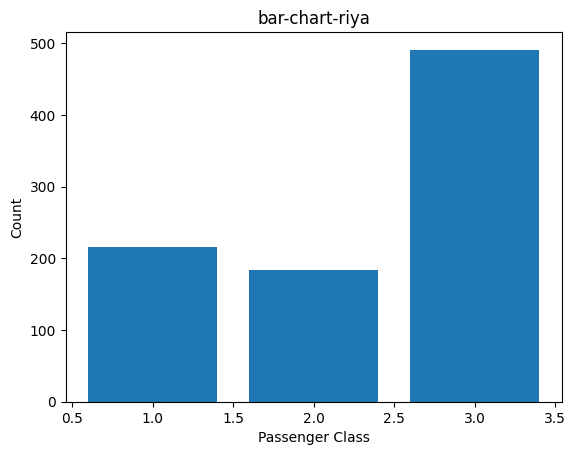

In [43]:
plt.bar(count.index, count.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('bar-chart-riya')
plt.show()

4-1- passenger class 3 has the highest count compared to class 1,2

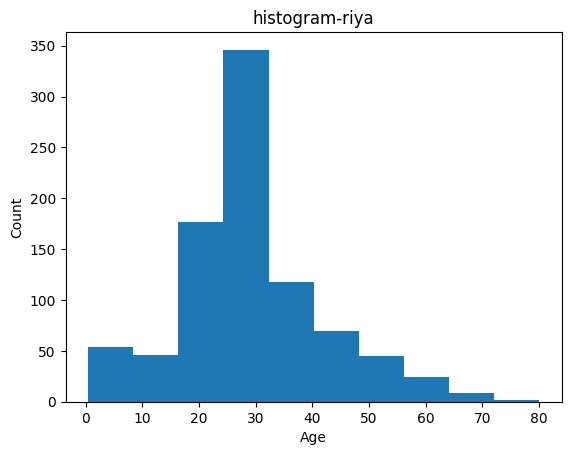

In [42]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('histogram-riya')
plt.show()

4-2- most oif the people were from 25-30 years of age

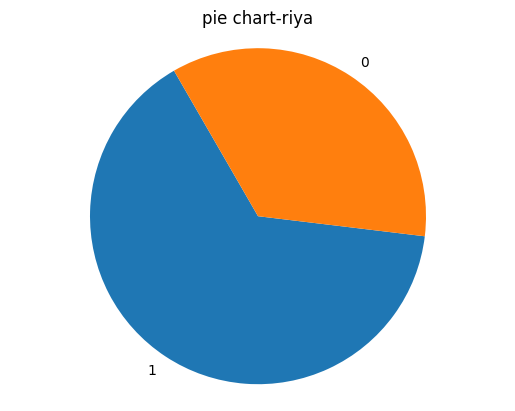

In [44]:
gender_count = df['Sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index,startangle=120)
plt.axis('equal')
plt.title('pie chart-riya')
plt.show()

4-3- significantly there were more male passengers compared to female

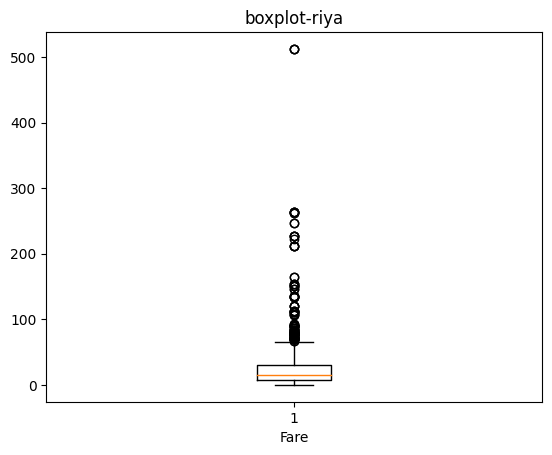

In [45]:
plt.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.title('boxplot-riya')
plt.show()


4-4 fare was mainly distributed in 70-175 

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_features = ['Sex', 'Embarked']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C85,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C123,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,E46,2


In [46]:
numerical=['PassengerId','Survived','Pclass','Age','Parch','SibSp','Fare','Sex','Embarked']
numericals=df[numerical]

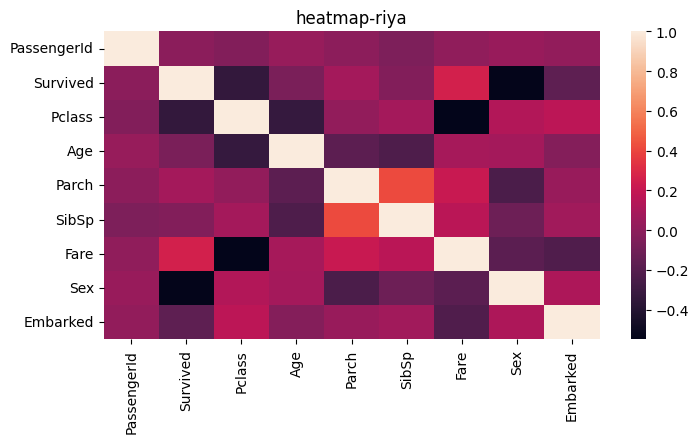

In [50]:
plt.figure(figsize=(8, 4))
sns.heatmap(numericals.corr())
plt.title('heatmap-riya')
plt.show()

4-5- yes there is a corr between sipsp and parch, survived and fare

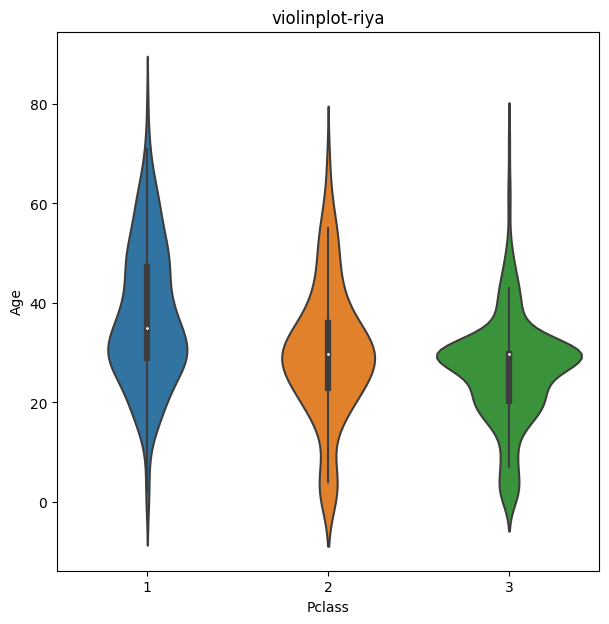

In [52]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('violinplot-riya')
plt.show()

4-6-class 1 were having a wider range of age then class 2 and 3, while class 3 has maximum number of passengers of age between 20-40 

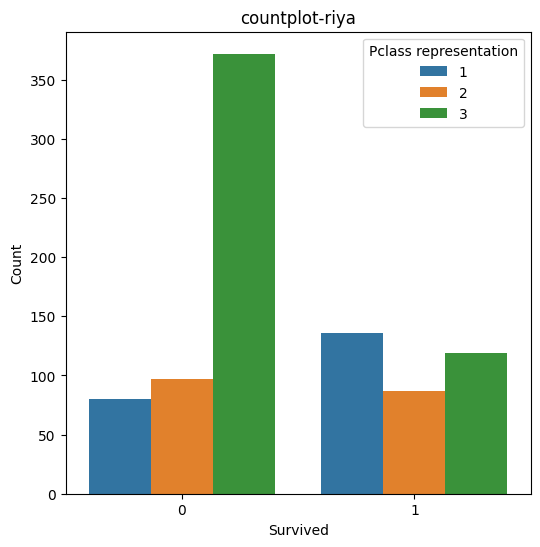

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Survived',hue='Pclass')
plt.title('countplot-riya')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass representation',loc='upper right')
plt.show()

4-7- female of class 3 has hgihest survival rate and female of class 1 has lowest while in male class 1 male survived better and class 2 male survived the least

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


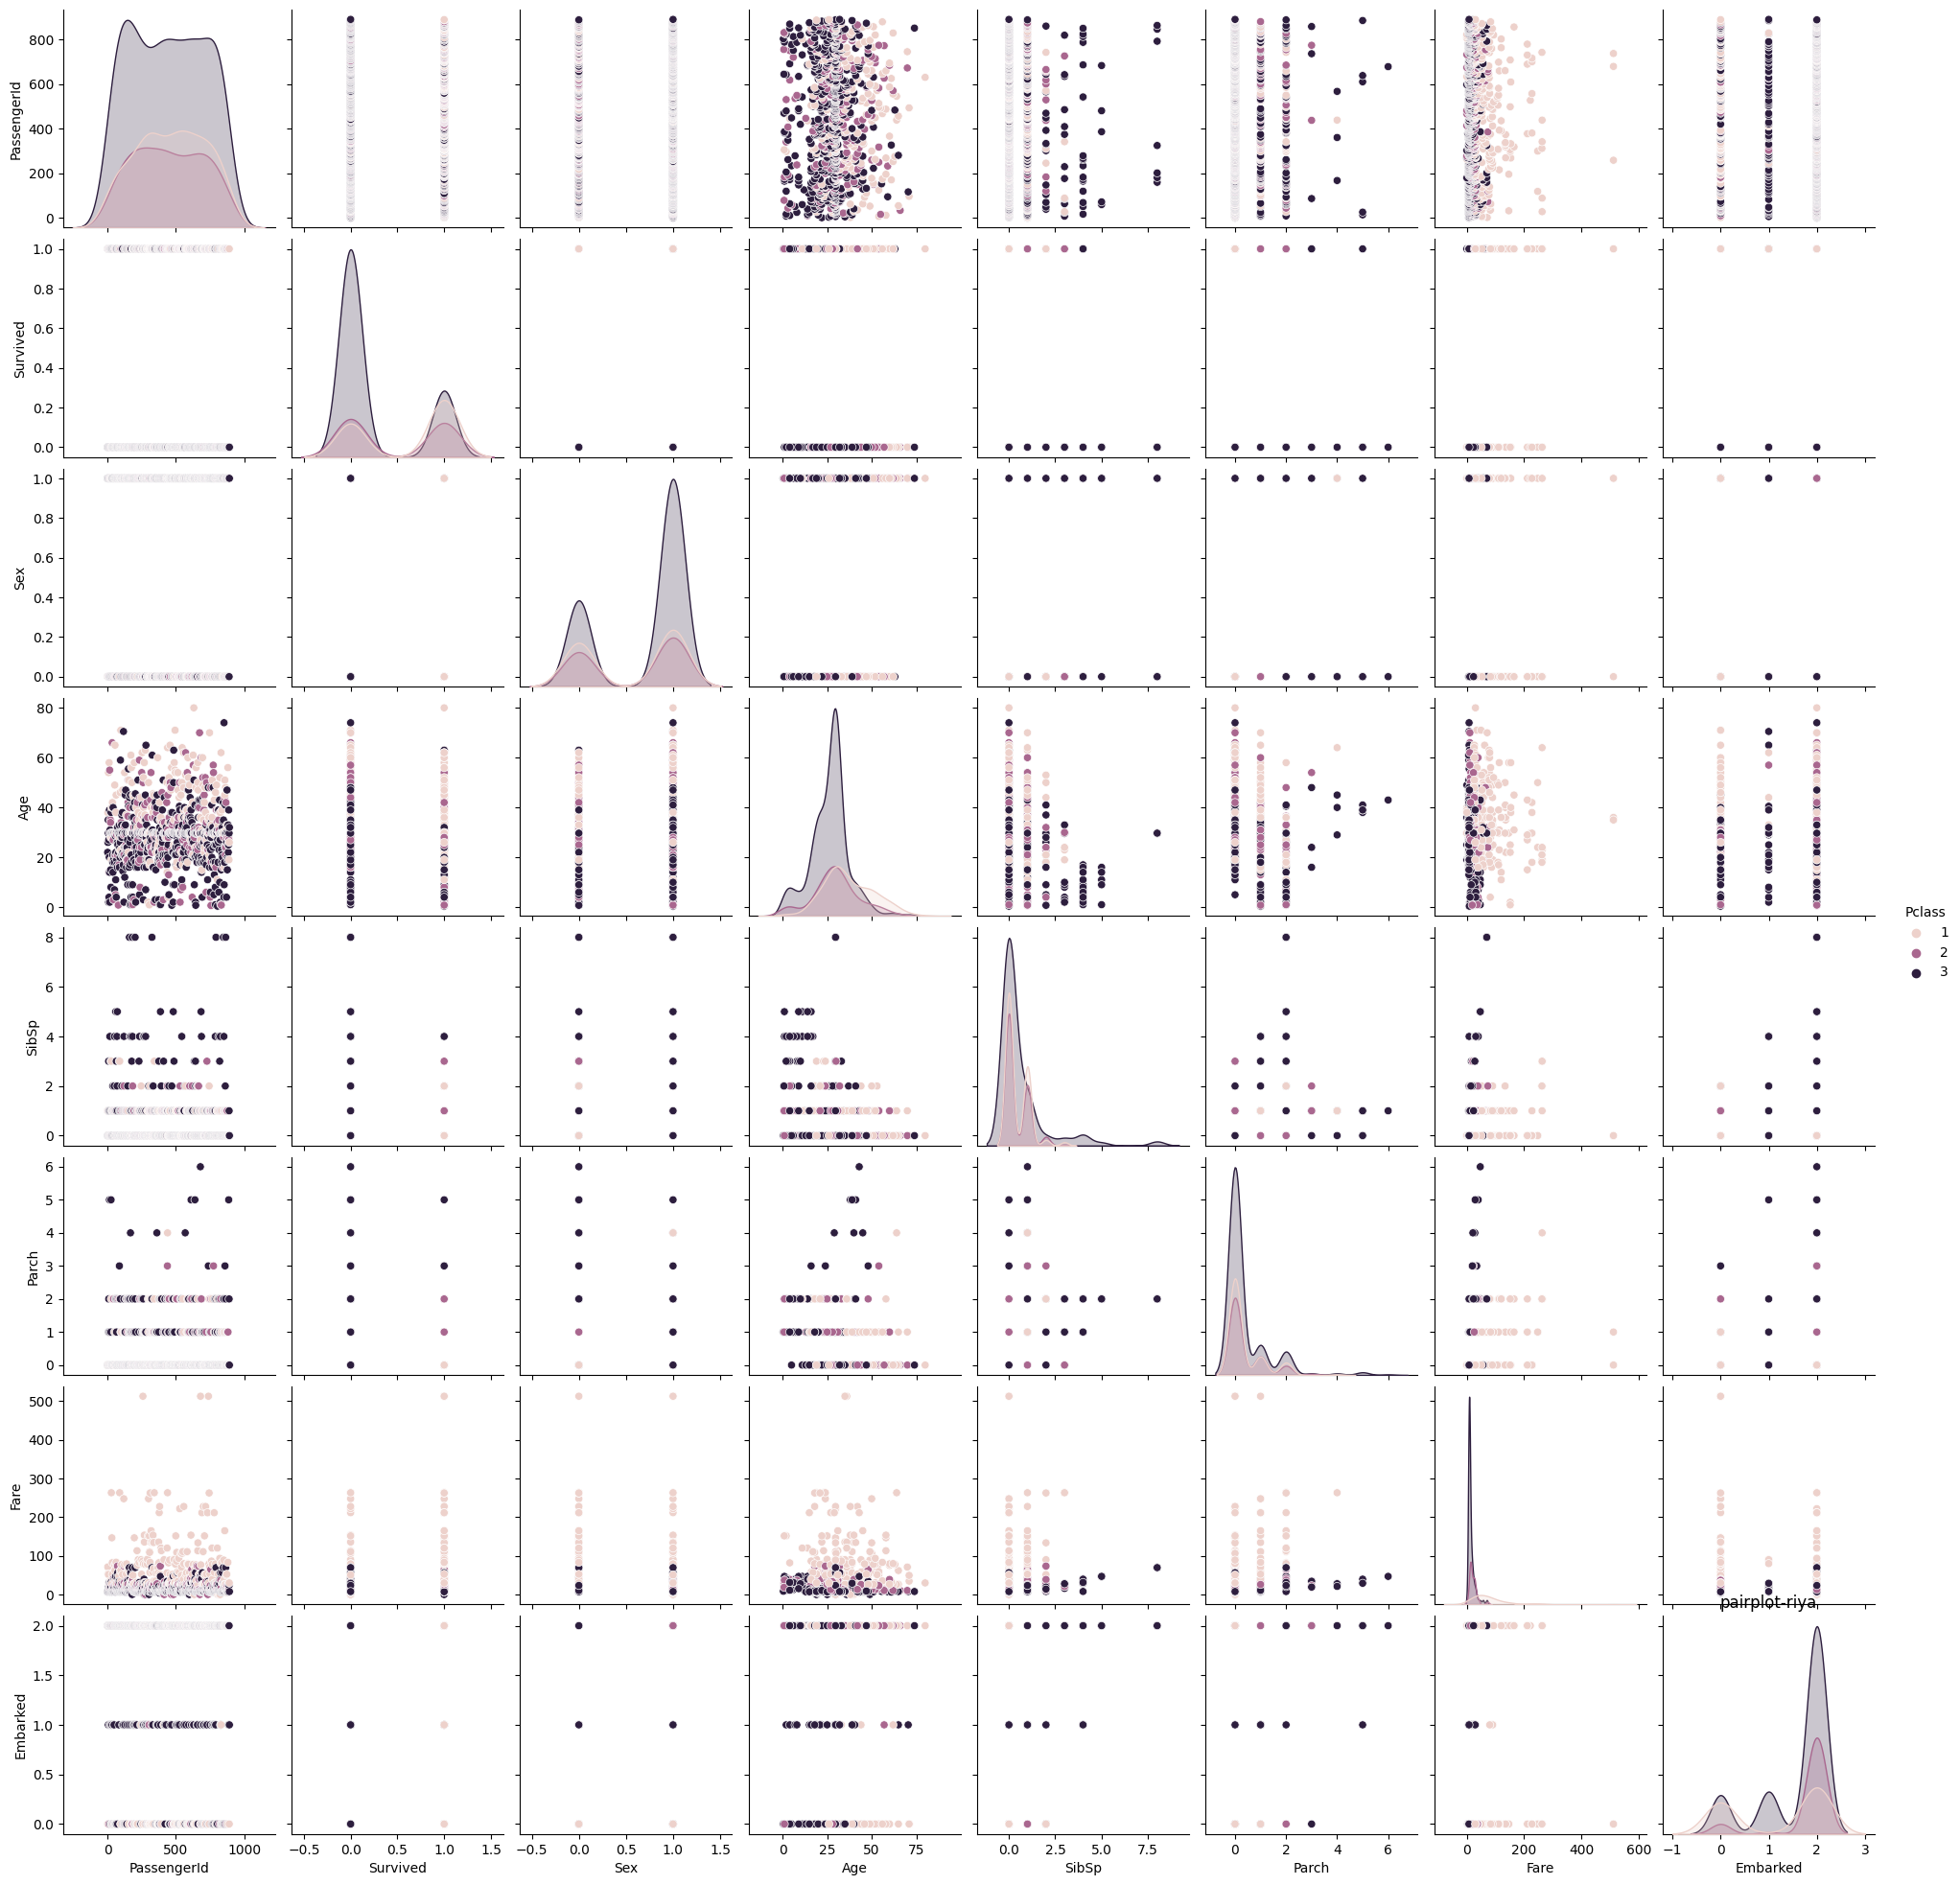

In [55]:
sns.pairplot(df, hue='Pclass')
plt.title('pairplot-riya')
plt.show()